<a href="https://colab.research.google.com/github/Ianushkalakra/Fraud-Detection-in-Financial-Transactions/blob/main/fraud_detection_in_financial_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"

df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [ ]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


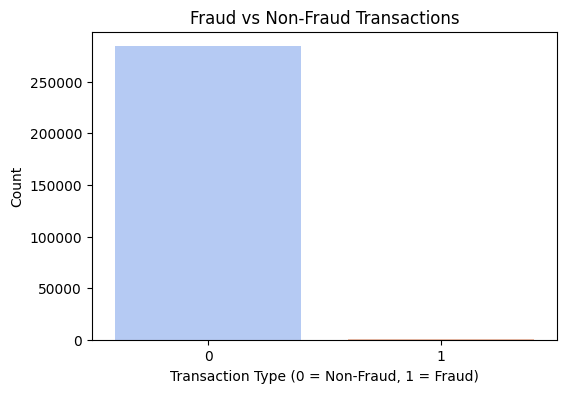

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

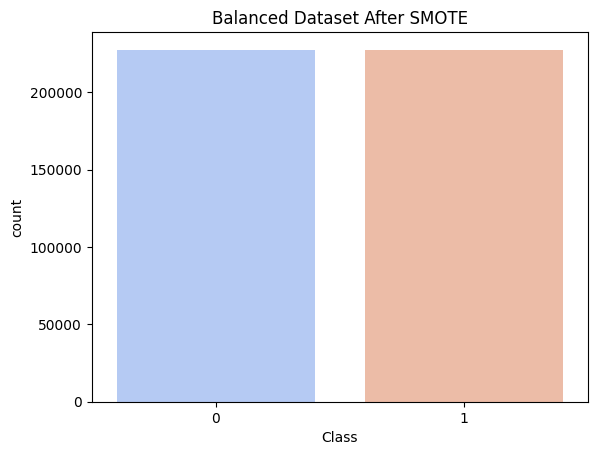

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train, palette='coolwarm')
plt.title("Balanced Dataset After SMOTE")
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56847    17]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_anomaly = iso_forest.fit_predict(X_test)

y_pred_anomaly = [1 if x == -1 else 0 for x in y_pred_anomaly]
print(confusion_matrix(y_test, y_pred_anomaly))
print(classification_report(y_test, y_pred_anomaly))

[[56357   507]
 [   35    63]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.11      0.64      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.82      0.59     56962
weighted avg       1.00      0.99      0.99     56962

